In [2]:
import time
import flappy_bird_gym
import numpy as np
import matplotlib.pyplot as plt
env = flappy_bird_gym.make("FlappyBird-v0")

In [3]:
n_x = 170
n_y = 200
n_observations = n_x*n_y
n_actions = 2

In [4]:
def state_to_index(x, y):
    idx = np.round(x*100)*200 + np.round((y+1)*100)
    return int(idx)

In [5]:
Q_table = np.zeros((n_observations,n_actions))
print(Q_table)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [6]:
env.reset()
obs = env.step(0)
state_to_index(*obs[0])

32896

In [7]:
#number of episode we will run
n_episodes = 10000

#maximum of iteration per episode
max_iter_episode = 10000

#initialize the exploration probability to 1
exploration_proba = 1

#exploartion decreasing decay for exponential decreasing
exploration_decreasing_decay = 0.001

# minimum of exploration proba
min_exploration_proba = 0.01

#discounted factor
gamma = 0.99

#learning rate
lr = 0.1

In [8]:
rewards_per_episode = list()

In [18]:
#we iterate over episodes
for e in range(70000):#n_episodes):
    #we initialize the first state of the episode
    current_state = env.reset()
    done = False
    
    #sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    reward = {'score':0}
    
    for i in range(max_iter_episode):
        if reward['score'] == 0 or current_state[1]>0 or current_state[1]<-.05:
            action = 0
            # env.action_space.sample() for a random action # 0 = nothing, 1 = flap
            if current_state[0] < 0.2:
                if current_state[1] < -.05:
                    action = 1
            else:
                if current_state[1] < -0.03:
                    action = 1

            # Processing:
            current_state, _, done, reward = env.step(action)
        else:
            # we sample a float from a uniform distribution over 0 and 1
            # if the sampled flaot is less than the exploration proba
            #     the agent selects arandom action
            # else
            #     he exploits his knowledge using the bellman equation 

            if np.random.uniform(0,1) < exploration_proba:
                action = env.action_space.sample()
            else:
                current_line = Q_table[state_to_index(*current_state),:]
                if current_line[0] == current_line[1]:
                    action = env.action_space.sample()
                else:
                    action = np.argmax(current_line)

            # The environment runs the chosen action and returns
            # the next state, a reward and true if the epiosed is ended.
            next_state, _ , done, reward = env.step(action)

            # We update our Q-table using the Q-learning iteration
            Q_table[state_to_index(*current_state), action] = (1-lr) * Q_table[state_to_index(*current_state), action] +lr*(1 + gamma*max(Q_table[state_to_index(*next_state),:]))
            total_episode_reward += 1
            # If the episode is finished, we leave the for loop
            if done:
                break
            current_state = next_state
    #We update the exploration proba using exponential decay formula 
    exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
    rewards_per_episode.append(total_episode_reward)

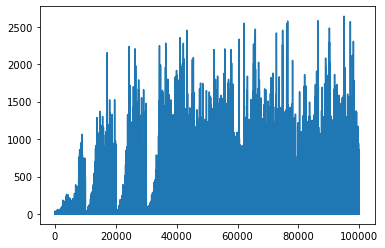

In [19]:
plt.plot(rewards_per_episode)

In [20]:
env.step(0)

(array([0.27430556, 0.11328125]), 1, True, {'score': 25})

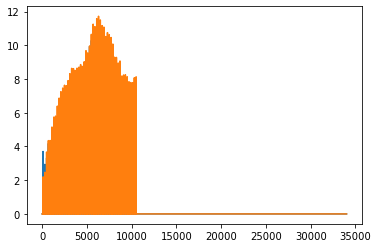

In [21]:
plt.plot(Q_table)